In [1]:
# using keras imdb dataset
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Embedding, LSTM
from keras.callbacks import ModelCheckpoint

import os
from sklearn.metrics import roc_auc_score

import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# set up params
output = 'model/dense_example'
epochs = 4
batch = 128

n_dim = 64
n_words = 5000
n_words_skip = 50
max_length = 100
pad_type = trunc_type = 'pre' # truncate start of reviews

n_dense = 64
dropout = 0.5

In [4]:
# load data
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=n_words, skip_top=n_words_skip)

In [5]:
# example of how to go back to words from int 
w_idx = keras.datasets.imdb.get_word_index()
w_idx = {k:(v+3) for k,v in w_idx.items()}
w_idx['PAD'] = 0
w_idx['START'] = 1
w_idx['UNK'] = 2

index_word = {v:k for k,v in w_idx.items()}

In [6]:
x_train = pad_sequences(x_train, maxlen=max_length, padding=pad_type, truncating=trunc_type, value=0)
x_val = pad_sequences(x_val, maxlen=max_length, padding=pad_type, truncating=trunc_type, value=0)

In [13]:
# setup our nn model
model = Sequential()

model.add(Embedding(n_words, n_dim, input_length=max_length))
model.add(LSTM(64, dropout=dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 353,089
Trainable params: 353,089
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(
    x_train, 
    y_train,
    epochs=epochs, 
    batch_size=batch, 
    verbose=1, 
    validation_data=(x_val, y_val))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 31s 1ms/step - loss: 0.5144 - acc: 0.7236 - val_loss: 0.3502 - val_acc: 0.8460
Epoch 2/4
25000/25000 [==============================] - 30s 1ms/step - loss: 0.3269 - acc: 0.8606 - val_loss: 0.3517 - val_acc: 0.8461
Epoch 3/4
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2875 - acc: 0.8816 - val_loss: 0.3523 - val_acc: 0.8471
Epoch 4/4
25000/25000 [==============================] - 31s 1ms/step - loss: 0.2578 - acc: 0.8954 - val_loss: 0.3495 - val_acc: 0.8472


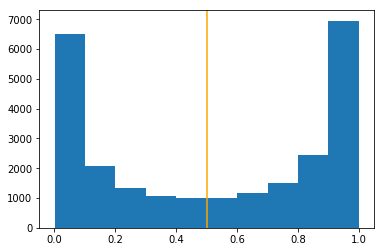

In [17]:
plt.hist(model.predict(x_val))
_ = plt.axvline(x=0.5, color='orange')